In [ ]:
"""
This simulator allows the user to put in inputs for 3 DCF scenarios, then performs 5000 simulations for Scenario A, 2500 for B and 2500 for C. The results are displayed under 'Outputs', which shows the probability and cumulative distribution of upsides based on these simulations, and a summary stable of statistics. 


"""

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import pandas.io.data as web
from pandas.io.data import DataReader
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from scipy.stats import norm
import random
import datetime

%matplotlib inline 

/Users/christopherwaller/anaconda/lib/python2.7/site-packages/pandas/io/data.py:33: FutureWarning: 
The pandas.io.data module is moved to a separate package (pandas-datareader) and will be removed from pandas in a future version.
After installing the pandas-datareader package (https://github.com/pydata/pandas-datareader), you can change the import ``from pandas.io import data, wb`` to ``from pandas_datareader import data, wb``.
  FutureWarning)


# Inputs

In [2]:
symbol = 'GOOGL'

price = web.DataReader(symbol, data_source='yahoo', end=datetime.datetime.now())['Adj Close'][-1]

shares_out = 686.5
debt = 5220
cash = 73066
use_of_cash = 0.05

#Scenarios used:
A = 'Yes'
B = 'Yes'
C = 'Yes'

# 
Scenario A

In [3]:
n_a = 5000  #make sure is changed for scenarios B, C.
r_a = 0.085
fcf1_a = 17266
fcf5_a = 43880

g0_a = 0 #unused as just pushing DCF back 1 period
g1_a = 0.233
g2_a = 0.208
g3_a = 0.091
g4_a = 0.05 #unused if fcf5 entered directly
g5_a = 0.155
g6_a = 0.119
g7_a = 0.083
g8_a = 0.047
g9_a = 0.02
g10_a = 0.02
g11_a = 0.02
g12_a = 0.02
g13_a = 0.02
g14_a = 0.02
g15_a = 0.02
gt_a = 0.02


# 
Scenario B

In [4]:
n_b = 2500  #make sure is changed for scenarios B, C.
r_b = 0.065
fcf1_b = 17266
fcf5_b = 43880

g0_b = 0 #unused as just pushing DCF back 1 period
g1_b = 0.233
g2_b = 0.208
g3_b = 0.091
g4_b = 0.05 #unused if fcf5 entered directly
g5_b = 0.155
g6_b = 0.119
g7_b = 0.083
g8_b = 0.047
g9_b = 0.02
g10_b = 0.02
g11_b = 0.02
g12_b = 0.02
g13_b = 0.02
g14_b = 0.02
g15_b = 0.02
gt_b = 0.02


# 
Scenario C

In [5]:
n_c = 2500  #make sure is changed for scenarios B, C.
r_c = 0.095
fcf1_c = 17266
fcf5_c = 36000

g0_c = 0 #unused as just pushing DCF back 1 period
g1_c = 0.233
g2_c = 0.208
g3_c = 0.091
g4_c = 0.05 #unused if fcf5 entered directly
g5_c = 0.155
g6_c = 0.119
g7_c = 0.083
g8_c = 0.047
g9_c = 0.02
g10_c = 0.02
g11_c = 0.02
g12_c = 0.02
g13_c = 0.02
g14_c = 0.02
g15_c = 0.02
gt_c = 0.0


# DCF Monte Carlo

In [6]:
def sim(n, mu):
    outcomes = []
    for p in range(n):
        outcomes.append(random.gauss(mu,mu/2)) #stdev should vary by how much??
    return outcomes

# 
Discount rates

In [7]:
R_a = [max(0,x*0.5)+0.5*r_a for x in sim(n_a, r_a)] #only using 0.5x usual stdev and limited to positive numbers
R_b = [max(0,x*0.5)+0.5*r_b for x in sim(n_b, r_b)]
R_c = [max(0,x*0.5)+0.5*r_c for x in sim(n_b, r_c)]

# 
Growth rates

In [8]:
g0_a = [x + 1 for x in sim(n_a, g0_a)]
g1_a = [x + 1 for x in sim(n_a, g1_a)]
g2_a = [x + 1 for x in sim(n_a, g2_a)]
g3_a = [x + 1 for x in sim(n_a, g3_a)]
g4_a = [x + 1 for x in sim(n_a, g4_a)]
g5_a = [x + 1 for x in sim(n_a, g5_a)]
g6_a = [x + 1 for x in sim(n_a, g6_a)]
g7_a = [x + 1 for x in sim(n_a, g7_a)]
g8_a = [x + 1 for x in sim(n_a, g8_a)]
g9_a = [x + 1 for x in sim(n_a, g9_a)]
g10_a = [x + 1 for x in sim(n_a, g10_a)]
g11_a = [x + 1 for x in sim(n_a, g11_a)]
g12_a = [x + 1 for x in sim(n_a, g12_a)]
g13_a = [x + 1 for x in sim(n_a, g13_a)]
g14_a = [x + 1 for x in sim(n_a, g14_a)]
g15_a = [x + 1 for x in sim(n_a, g15_a)]
gt_a = [x + 1 for x in sim(n_a, gt_a)]

In [9]:
g0_b = [x + 1 for x in sim(n_b, g0_b)]
g1_b = [x + 1 for x in sim(n_b, g1_b)]
g2_b = [x + 1 for x in sim(n_b, g2_b)]
g3_b = [x + 1 for x in sim(n_b, g3_b)]
g4_b = [x + 1 for x in sim(n_b, g4_b)]
g5_b = [x + 1 for x in sim(n_b, g5_b)]
g6_b = [x + 1 for x in sim(n_b, g6_b)]
g7_b = [x + 1 for x in sim(n_b, g7_b)]
g8_b = [x + 1 for x in sim(n_b, g8_b)]
g9_b = [x + 1 for x in sim(n_b, g9_b)]
g10_b = [x + 1 for x in sim(n_b, g10_b)]
g11_b = [x + 1 for x in sim(n_b, g11_b)]
g12_b = [x + 1 for x in sim(n_b, g12_b)]
g13_b = [x + 1 for x in sim(n_b, g13_b)]
g14_b = [x + 1 for x in sim(n_b, g14_b)]
g15_b = [x + 1 for x in sim(n_b, g15_b)]
gt_b = [x + 1 for x in sim(n_b, gt_b)]

In [10]:
g0_c = [x + 1 for x in sim(n_c, g0_c)]
g1_c = [x + 1 for x in sim(n_c, g1_c)]
g2_c = [x + 1 for x in sim(n_c, g2_c)]
g3_c = [x + 1 for x in sim(n_c, g3_c)]
g4_c = [x + 1 for x in sim(n_c, g4_c)]
g5_c = [x + 1 for x in sim(n_c, g5_c)]
g6_c = [x + 1 for x in sim(n_c, g6_c)]
g7_c = [x + 1 for x in sim(n_c, g7_c)]
g8_c = [x + 1 for x in sim(n_c, g8_c)]
g9_c = [x + 1 for x in sim(n_c, g9_c)]
g10_c = [x + 1 for x in sim(n_c, g10_c)]
g11_c = [x + 1 for x in sim(n_c, g11_c)]
g12_c = [x + 1 for x in sim(n_c, g12_c)]
g13_c = [x + 1 for x in sim(n_c, g13_c)]
g14_c = [x + 1 for x in sim(n_c, g14_c)]
g15_c = [x + 1 for x in sim(n_c, g15_c)]
gt_c = [x + 1 for x in sim(n_c, gt_c)]

# 
Free cash flows

In [11]:
fcf0_a = range(0, 0 + 1) * n_a
fcf1_a = range(fcf1_a, fcf1_a + 1) * n_a
fcf2_a = [x*y for x, y in zip(fcf1_a, g1_a)]
fcf3_a = [x*y for x, y in zip(fcf2_a, g2_a)]
fcf4_a = [x*y for x, y in zip(fcf3_a, g3_a)]
fcf5_a = range(fcf5_a, fcf5_a + 1) * n_a
fcf6_a = [x*y for x, y in zip(fcf5_a, g5_a)]
fcf7_a = [x*y for x, y in zip(fcf6_a, g6_a)]
fcf8_a = [x*y for x, y in zip(fcf7_a, g7_a)]
fcf9_a = [x*y for x, y in zip(fcf8_a, g8_a)]
fcf10_a = [x*y for x, y in zip(fcf9_a, g9_a)]
fcf11_a = [x*y for x, y in zip(fcf10_a, g10_a)]
fcf12_a = [x*y for x, y in zip(fcf11_a, g11_a)]
fcf13_a = [x*y for x, y in zip(fcf12_a, g12_a)]
fcf14_a = [x*y for x, y in zip(fcf13_a, g13_a)]
fcf15_a = [x*y for x, y in zip(fcf14_a, g14_a)]
fcft_a = [x/(r_a-(y-1)) for x, y in zip(fcf15_a, gt_a)]

In [12]:
fcf0_b = range(0, 0 + 1) * n_b
fcf1_b = range(fcf1_b, fcf1_b + 1) * n_b
fcf2_b = [x*y for x, y in zip(fcf1_b, g1_b)]
fcf3_b = [x*y for x, y in zip(fcf2_b, g2_b)]
fcf4_b = [x*y for x, y in zip(fcf3_b, g3_b)]
fcf5_b = range(fcf5_b, fcf5_b + 1) * n_b
fcf6_b = [x*y for x, y in zip(fcf5_b, g5_b)]
fcf7_b = [x*y for x, y in zip(fcf6_b, g6_b)]
fcf8_b = [x*y for x, y in zip(fcf7_b, g7_b)]
fcf9_b = [x*y for x, y in zip(fcf8_b, g8_b)]
fcf10_b = [x*y for x, y in zip(fcf9_b, g9_b)]
fcf11_b = [x*y for x, y in zip(fcf10_b, g10_b)]
fcf12_b = [x*y for x, y in zip(fcf11_b, g11_b)]
fcf13_b = [x*y for x, y in zip(fcf12_b, g12_b)]
fcf14_b = [x*y for x, y in zip(fcf13_b, g13_b)]
fcf15_b = [x*y for x, y in zip(fcf14_b, g14_b)]
fcft_b = [x/(r_b-(y-1)) for x, y in zip(fcf15_b, gt_b)]

In [13]:
fcf0_c = range(0, 0 + 1) * n_c
fcf1_c = range(fcf1_c, fcf1_c + 1) * n_c
fcf2_c = [x*y for x, y in zip(fcf1_c, g1_c)]
fcf3_c = [x*y for x, y in zip(fcf2_c, g2_c)]
fcf4_c = [x*y for x, y in zip(fcf3_c, g3_c)]
fcf5_c = range(fcf5_c, fcf5_c + 1) * n_c
fcf6_c = [x*y for x, y in zip(fcf5_c, g5_c)]
fcf7_c = [x*y for x, y in zip(fcf6_c, g6_c)]
fcf8_c = [x*y for x, y in zip(fcf7_c, g7_c)]
fcf9_c = [x*y for x, y in zip(fcf8_c, g8_c)]
fcf10_c = [x*y for x, y in zip(fcf9_c, g9_c)]
fcf11_c = [x*y for x, y in zip(fcf10_c, g10_c)]
fcf12_c = [x*y for x, y in zip(fcf11_c, g11_c)]
fcf13_c = [x*y for x, y in zip(fcf12_c, g12_c)]
fcf14_c = [x*y for x, y in zip(fcf13_c, g13_c)]
fcf15_c = [x*y for x, y in zip(fcf14_c, g14_c)]
fcft_c = [x/(r_c-(y-1)) for x, y in zip(fcf15_c, gt_c)]

In [14]:
fcfs_a = np.array([fcf0_a, fcf1_a, fcf2_a, fcf3_a, fcf4_a, fcf5_a, fcf6_a, fcf7_a, fcf8_a, fcf9_a, fcf10_a, fcf11_a, fcf12_a, fcf13_a, fcf14_a, fcf15_a, fcft_a]).T
fcfs_b = np.array([fcf0_b, fcf1_b, fcf2_b, fcf3_b, fcf4_b, fcf5_b, fcf6_b, fcf7_b, fcf8_b, fcf9_b, fcf10_b, fcf11_b, fcf12_b, fcf13_b, fcf14_b, fcf15_b, fcft_b]).T
fcfs_c = np.array([fcf0_c, fcf1_c, fcf2_c, fcf3_c, fcf4_c, fcf5_c, fcf6_c, fcf7_c, fcf8_c, fcf9_c, fcf10_c, fcf11_c, fcf12_c, fcf13_c, fcf14_c, fcf15_c, fcft_c]).T

In [15]:
#DataFrame(fcfs)

# 
NPVs

In [16]:
npvs_a = [np.npv(x, y) for x, y in zip(R_a, fcfs_a)]
npvs_b = [np.npv(x, y) for x, y in zip(R_b, fcfs_b)]
npvs_c = [np.npv(x, y) for x, y in zip(R_c, fcfs_c)]

equity_values_a = [(npv - debt + (cash * use_of_cash))/shares_out for npv in npvs_a]
equity_values_b = [(npv - debt + (cash * use_of_cash))/shares_out for npv in npvs_b]
equity_values_c = [(npv - debt + (cash * use_of_cash))/shares_out for npv in npvs_c]

upsides_a = [max(-1, equity_value/price -1 - 0.02) for equity_value in equity_values_a] #knock off 2% to adjust for longer DCF than excel
upsides_b = [max(-1, equity_value/price -1 - 0.02) for equity_value in equity_values_b]
upsides_c = [max(-1, equity_value/price -1 - 0.02) for equity_value in equity_values_c]

In [17]:
if A == 'Yes' and B == 'No' and C == 'No':
    total_upsides = upsides_a
elif A == 'Yes' and B == 'Yes' and C == 'No':
    total_upsides = upsides_a + upsides_b
elif A == 'Yes' and B == 'No' and C == 'Yes':
    total_upsides = upsides_a + upsides_c    
elif A == 'No' and B == 'Yes' and C == 'Yes':
    total_upsides = upsides_b + upsides_c 
elif A == 'No' and B == 'Yes' and C == 'No':
    total_upsides = upsides_b
elif A == 'No' and B == 'No' and C == 'Yes':
    total_upsides = upsides_c 
elif A == 'Yes' and B == 'Yes' and C == 'Yes':
    total_upsides = upsides_a + upsides_b + upsides_c
else:
    print '!ERROR!'

In [18]:
total_upsides = [x for x in total_upsides if x < np.percentile(total_upsides, 99)]

# Outputs

In [19]:
data = total_upsides
weights = np.ones_like(data)/len(data)

risk = abs(sum([x*y for x, y in zip(total_upsides, weights) if x <0]))
reward = sum([x*y for x, y in zip(total_upsides, weights) if x >0])
rr = reward/risk

key_stats = {
    'mean': np.mean(data),
    'stdev': np.std(data),
    'risk': risk,
    'reward': reward,
    'rr': rr
    }

df_key_stats = np.round(DataFrame(key_stats, index=['key stats']), 3)
cols = df_key_stats.columns.tolist()
cols2 = cols[0:1] + cols[4:5] + cols[1:4]
df_key_stats = df_key_stats[cols2].T

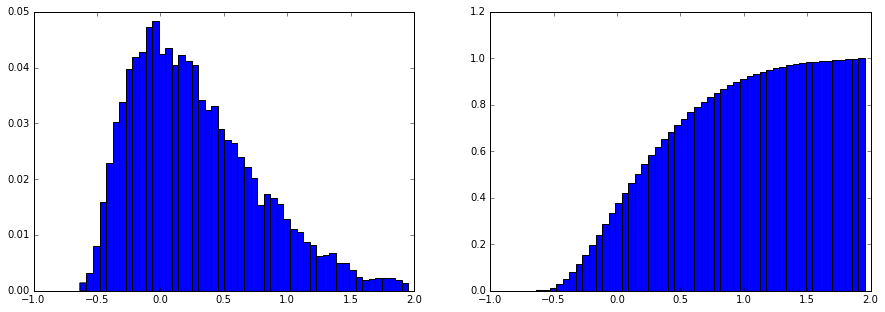

In [20]:
plt.figure(1, figsize=(15,5))
plt.subplot(121)
plt.hist(data, bins=50, weights=weights) 

plt.subplot(122)
plt.hist(data, bins=50, weights=weights, cumulative=True)
plt.show()

In [21]:
df_key_stats

,key stats
mean,0.274
stdev,0.496
reward,0.348
risk,0.074
rr,4.705
